# Logistic Regression

Logistic Regression is a statistical method for predicting binary outcomes from data.

Examples of this are "yes" vs "no" or "young" vs "old". 

These are categories that translate to probability of being a 0 or a 1 

We can calculate logistic regression by adding an activation function as the final step to our linear model. 

This converts the linear regression output to a probability.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import csv
import glob


from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)




Generate some data

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


In [4]:
# Store filepath in a variable
myData = "data/Combined_Data_Base_PN.csv"
myData_df = pd.read_csv(myData, encoding="ISO-8859-1")
#myData_df.dtypes
#myData_df.head()
myData_df.tail()

,date,recession,median_house,dow_open,fed_rate,InvYeild_10_5,unemployment,earnings_chg,cpi,inflation,housing_starts
626,3/19/19,0,310600,25025.31,2.40,0.199,3.8,153,268.025,0.56,1199
627,4/19/19,0,339000,26019.67,2.41,0.172,3.6,216,269.070,0.53,1270
628,5/19/19,0,311000,26075.10,2.45,0.219,3.6,62,269.744,0.21,1264
629,6/19/19,0,306000,26639.06,2.38,0.224,3.7,178,270.133,0.02,1233
630,7/19/19,0,312800,24830.16,2.39,0.243,3.7,159,270.381,0.17,1215


In [5]:
myData_df.columns

Index(['date', 'recession', 'median_house', 'dow_open', 'fed_rate',
       'InvYeild_10_5', 'unemployment', 'earnings_chg', 'cpi', 'inflation',
       'housing_starts'],
      dtype='object')

In [6]:
# Visualizing both classes
#plt.scatter(X[:, 0], X[:, 1], c=y)
#plt.scatter(myData_df['fed_rate'],myData_df['dow_open'])

myData_df['recession'].value_counts()





0    541
1     90
Name: recession, dtype: int64

In [7]:
myData_df.groupby('recession').mean()

,median_house,dow_open,fed_rate,InvYeild_10_5,unemployment,earnings_chg,cpi,inflation,housing_starts
recession,,,,,,,,,
0,147979.297597,6979.518244,4.872828,0.388590,6.004436,187.770795,151.597567,0.301867,1480.695009
1,104696.666667,4066.570333,8.198778,0.176078,6.512222,-170.800000,120.043367,0.476778,1139.311111


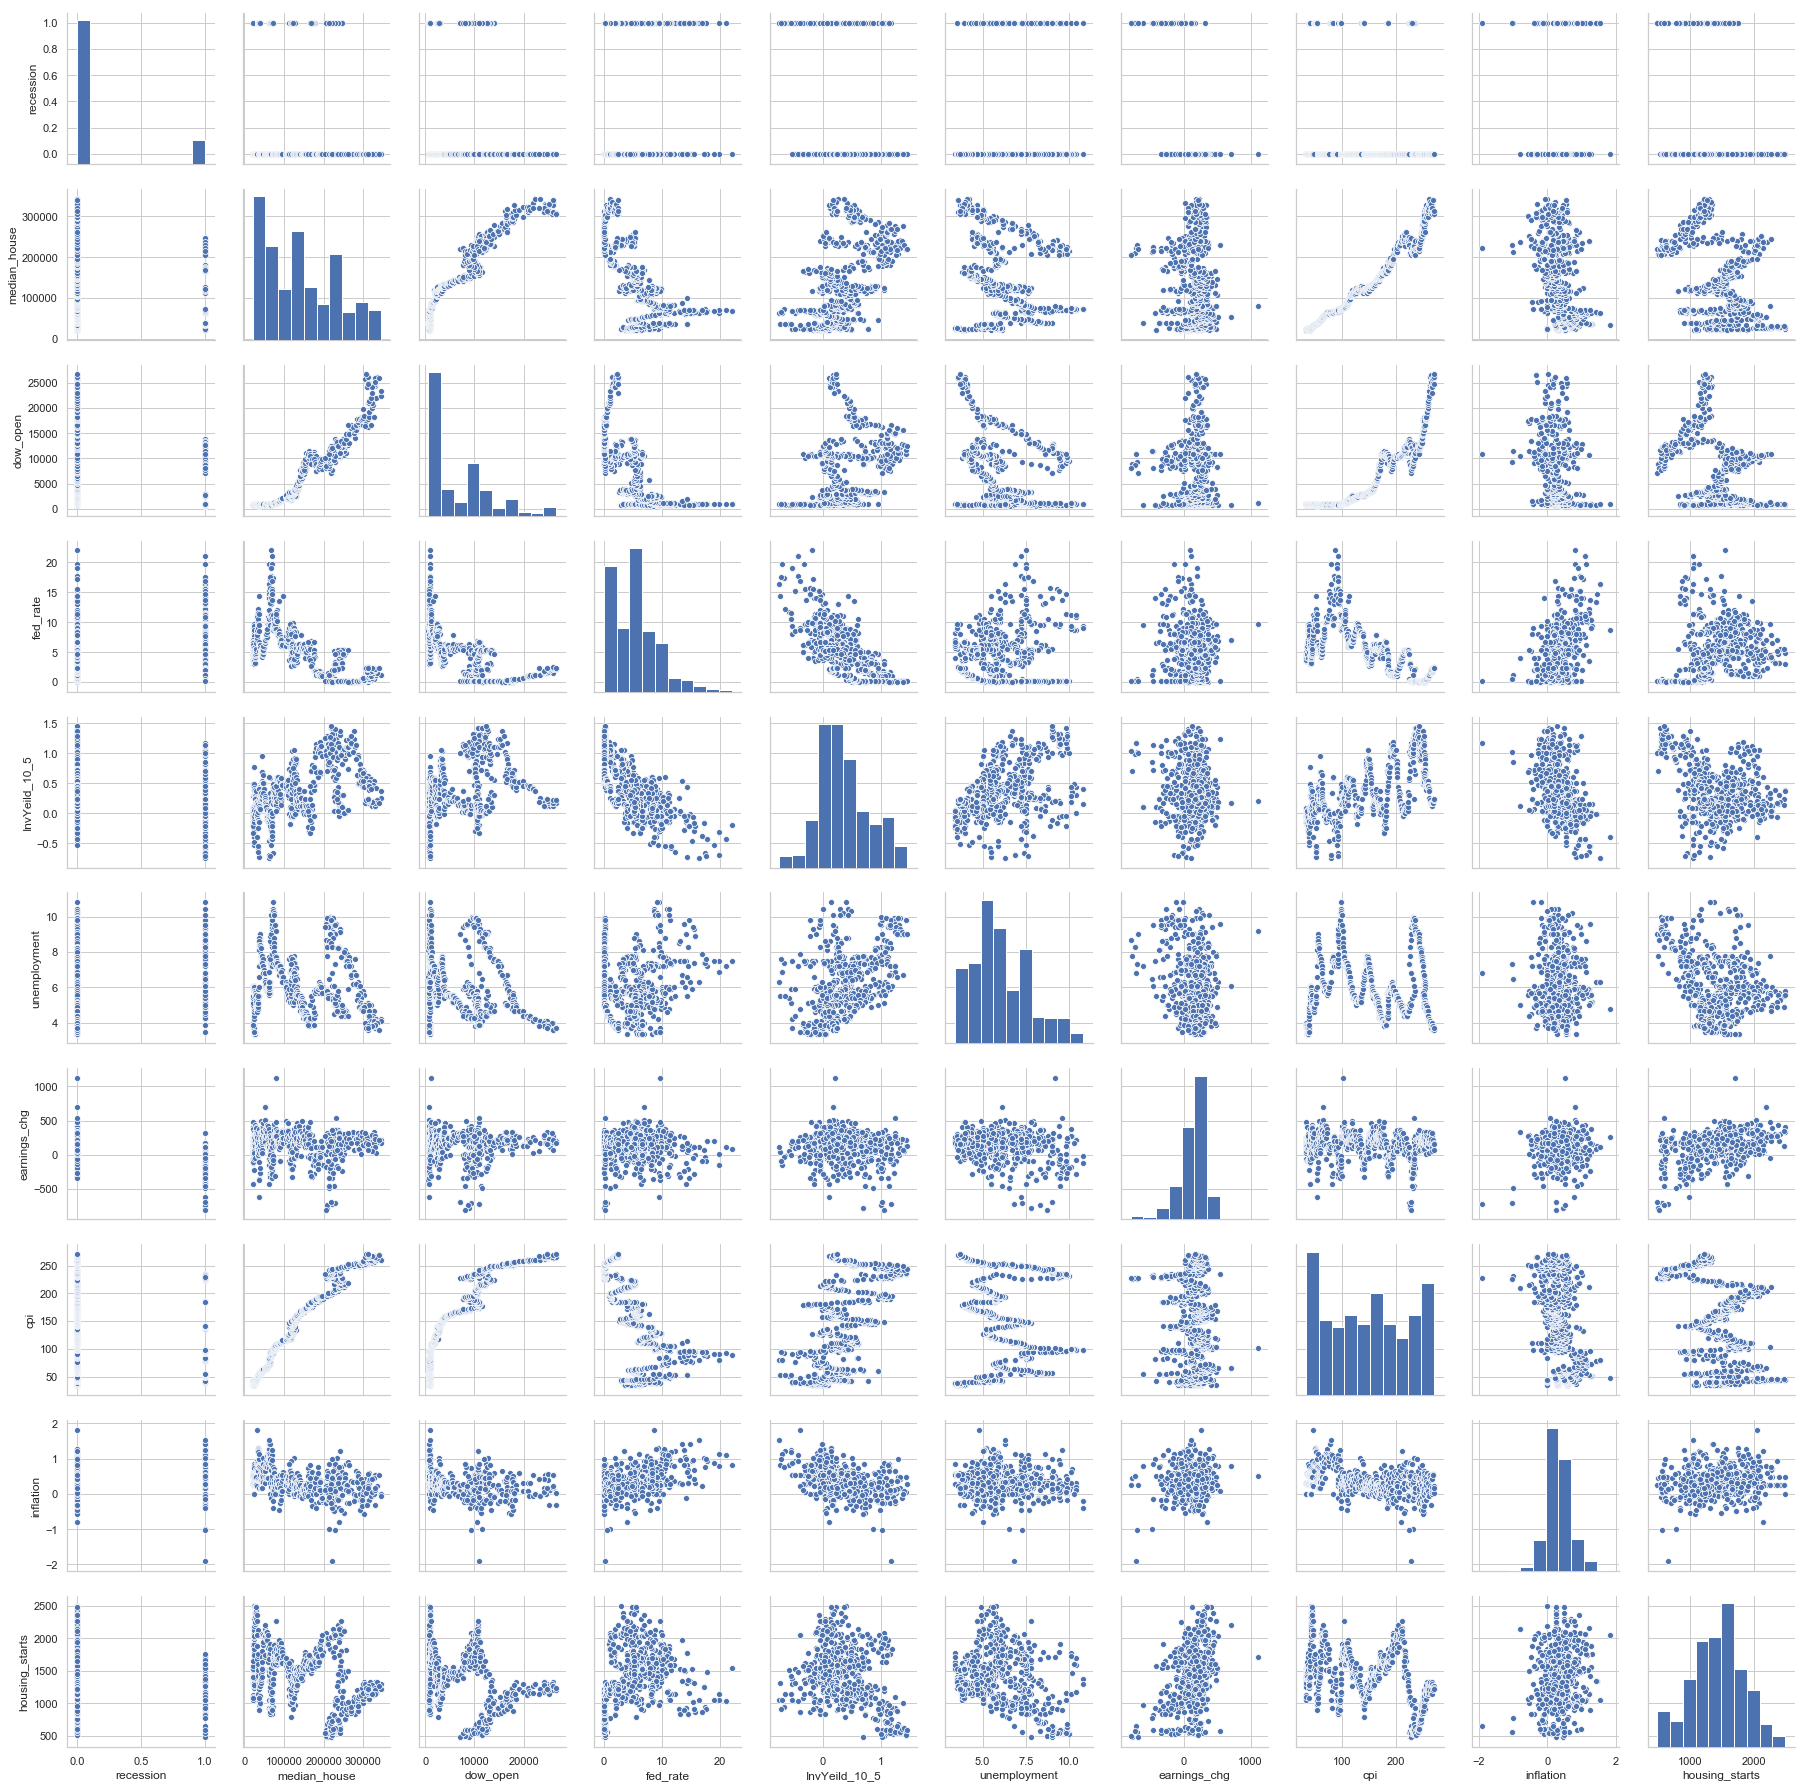

In [8]:
# Basic correlogram
sns.pairplot(myData_df,kind="scatter")
#sns.plt.show()
plt.show()

# without regression
#sns.pairplot(df, kind="scatter")
#plot.show()



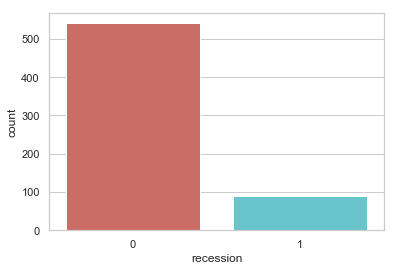

In [9]:
sns.countplot(x='recession', data=myData_df, palette='hls')
plt.show()




In [10]:
cols= ['median_house', 'dow_open', 'fed_rate', 'unemployment', 'earnings_chg', 'cpi', 'inflation',
       'housing_starts']


X=myData_df[cols]
y=myData_df['recession']

In [11]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.135348
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.670     
Dependent Variable: recession        AIC:              186.8090  
Date:               2019-09-28 11:56 BIC:              222.3875  
No. Observations:   631              Log-Likelihood:   -85.405   
Df Model:           7                LL-Null:          -258.53   
Df Residuals:       623              LLR p-value:      7.8401e-71
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
median_house      -0.0001   0.0000 -2.4068 0.0161 -0.0001 -0.0000
dow_open           0.0004   0.0001  2.8658 0.0042  0.0001  0.0007


Split our data into training and testing

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

Create a Logistic Regression Model

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Fit (train) or model using the training data

In [14]:
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Validate the model using the test data

In [15]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9154334038054969
Testing Data Score: 0.9177215189873418


Make predictions

In [18]:
# Generate a new data point (the red circle)
import numpy as np
new_data = np.array([[-2, 6]])
#new_data[]

#plt.scatter(X[:, 0], X[:, 1], c=y)
#plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [17]:
# Predict the class (purple or yellow) of the new data point
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

NameError: name 'new_data' is not defined

In [ ]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})